In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('train.csv')
df.head()

X=df['Message']
Y=df['Type']

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

X_test1=df_test['Message']
Y_test1=df_test['Type']

In [4]:
df.describe()

,Type,Message
count,4142,4142
unique,2,3906
top,Friendly,"Ksnnk, S'xx myxx xyban"
freq,3585,26


In [5]:
spam_messages = df[df["Type"]=="Hostile"]
spam_messages.head()

,Type,Message
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs..."
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ..."


In [6]:
spam_messages.describe()

,Type,Message
count,557,557
unique,1,501
top,Hostile,Asi vypa wsl y Bsqcy 7250c. Rvcu cu wvyb ksi o...
freq,557,3


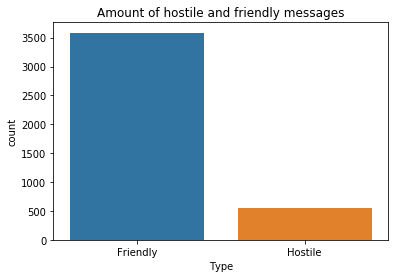

In [7]:
sns.countplot(data = df, x= df["Type"]).set_title("Amount of hostile and friendly messages")
plt.show()

**Splitting the SMS data into Test and Train data**

In [70]:
data_train, data_test, labels_train, labels_test = train_test_split(X,Y,test_size=0.1,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3727,) (3727,)
data_test, labels_test:  (415,) (415,)


In [71]:
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(1,9),max_df=0.7,min_df=2,sublinear_tf=True)
tfidf = tfidf_vectorizer.fit(data_train)
data_train_count  = tfidf.transform(data_train)
data_test_count  = tfidf.transform(data_test)
data_test_count2 = tfidf.transform(X_test1)

In [62]:
print(tfidf.get_feature_names())

[' !', ' ! ', ' ! *', ' ! *o', ' ! *on', ' ! *onc', ' ! *oncl', ' ! *onclu', ' ! j', ' ! js', ' ! jsl', " ! jsl'", " ! jsl'b", " ! jsl'b ", ' ! l', ' ! ls', ' ! lsw', ' ! lsw ', ' ! m', ' ! o', ' ! s', ' ! s ', ' !!', ' !! ', ' !! s', ' !! s ', ' !! s v', ' !! s w', ' !! y', ' !! yl', ' !! ylt', ' !! ylt ', ' !! ylt s', " !!'", " !!''", " !!''.", " !!''. ", " !!''. s", " !!''. s ", ' #', ' # ', ' $', ' $ ', ' $ &', ' $ &x', ' $ &xb', ' $ &xb;', ' $ &xb;#', ' $ &xb;#&', ' $5', ' $5.', ' $5.0', ' $5.00', ' $5.00 ', ' $5.00 z', ' $5.00 za', ' $50', ' %', ' &', ' & ', ' & 1', ' & 10', ' & 100', ' & 1000', ' & 1000 ', ' & 1000 r', ' & a', ' & al', ' & alb', ' & alba', ' & alban', ' & alban ', ' & b', ' & bs', ' & bsq', ' & bsqc', ' & bsqcy', ' & bsqcy ', ' & by', ' & byq', ' & byqa', ' & byqa ', ' & byqa z', ' & i', ' & il', ' & ilx', ' & ilxc', ' & ilxce', ' & ilxcec', ' & j', ' & js', ' & jsi', ' & jsif', ' & jsifx', ' & jsifxa', ' & m', ' & ms', ' & msl', ' & mslt', ' & msltc', ' & msltc

In [63]:
data_test_count.shape, data_test_count2.shape

((829, 204629), (1380, 204629))

In [64]:
for i in range(1):
    clf = LinearSVC()
    clf.fit(data_train_count, labels_train)
    predictions = clf.predict(data_test_count)
    print ("accuracy_score : ", i, accuracy_score(labels_test, predictions))

accuracy_score :  0 0.991556091676719


In [65]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.991556091676719


In [66]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[709   0]
 [  7 113]]


In [67]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      1.00       709
     Hostile       1.00      0.94      0.97       120

    accuracy                           0.99       829
   macro avg       1.00      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829



In [68]:
predictions_test = clf.predict(data_test_count2)

In [69]:
df_predictions_test=pd.DataFrame(predictions_test)
df_predictions_test.to_csv('predictions_test11_cv.csv')

In [35]:
390*.00005

0.0195

In [97]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      0.99       709
     Hostile       0.98      0.94      0.96       120

    accuracy                           0.99       829
   macro avg       0.99      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829

